<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Estudiante1;rol</h3>
    <h3 align="center">Estudiante2;rol</h3>
    <h3 align="center">Agosto de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b></font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 16 de septiembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Limpiando Datos (15p)

Como se mencionó en la ayudantía de laboratorio, la limpieza de datos es algo importante que se debe realizar antes de trabajar con un conjunto de datos, en esta sección trabajará con el dataset "limpieza.csv". Se espera que usted sea capaz de evidenciar las fallas dentro de este dataset y después de realizar la limpieza presente el dataset final resultante para comparar. 

>**Importante:** Si bien la limpieza es subjetiva, no optará a todo el puntaje de esta sección si presenta una limpieza incompleta (se observa que su dataset final se puede limpiar más a simple vista).

## 2. Apps en la Playstore (35p)

Google Play Store actualmente posee una enorme cantidad de aplicaciones que pueden ser descargadas por los usuarios. En esta sección utilizará una pequeña parte de dicho universo y trabajará principalmente en análisis exploratorio de los datos para responder las preguntas que verá a continuación. 

El archivo a utilizar es "googleplaystore.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/lava18/google-play-store-apps)

>PD: Hay 1 fila mala en el dataset, no es difícil de identificar.

>a) ¿Es posible observar alguna concentración de ratings de las aplicaciones en torno a un intervalo? Si su respuesta es sí, ¿Qué rango/s tiene/n mayor concentración?

Si es posible observar una mayor concentración entorno a ciertos intervalos. Para esto se utilizo un histograma con clases definidas segun Sturges. A partir del histograma obtenido, se observa que las clases 13 y 14 son las que presentan una mayor concentración, es decir, se concetran entre un rating de 4.2 y 4.733.

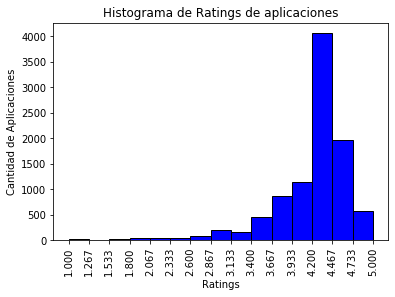

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline


data = pd.read_csv("googleplaystore.csv")


data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"]==19].index

data=data.drop(i)

notas = data["Rating"]

mediana=notas.median()

notas.fillna(mediana, inplace=True)

#intervalos = [1,1.27,1.54,1.81,2.08,2.35,2.89,3.16,3.43,3.7,3.97,4.24,4.51,4.78,5.05,5.32]
notas = notas[notas != 19.0]


counts, bins , patches = plt.hist(notas,bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Histograma de Ratings de aplicaciones')

plt.xticks(bins,rotation="vertical")

plt.show()


    



>b) ¿Qué grupo tiene ratings más dispersos, las aplicaciones que pertenecen a la categoría de "EDUCATION" o las que pertenecen a la categoría de "MEDICAL"? Utilice al menos 1 recurso visual y 1 medida de tendencia para responder. 

La categoria MEDICAL de las aplicaciones es mas disperso que la categoria EDUCATION de las aplicaciones. Esto se demuestra a traves de dos elementos, primero la diferencia entre los valores de las desviaciones estandar de cada grupo de aplicaciones, para las aplicaciones de categoria MEDICAL se obutvo una desviación estandar del 0.70, mientras que para las aplicaciones de la categoria EDUCATION se obtuvo una desviación estandar del 0.27. Estos valores de varianza indican que los valores de rating de MEDICAL se distribuyen más a lo lejos del promedio de la muestra que las de EDUCATION, esta ultima con mas valores acumulados cerca de su promedio.

Lo anterior se ve complementado con un boxplot por Rating de las categorias MEDICAL y EDUCATION, el cual muestra dos cosas significativas, en primer lugar se ve que la caja de EDUCATION esta más comprimida que la caja de MEDICAL, indicando que el 50% de los valores de rating de EDUCATION son más cercanos a la mediana (Quartil 2) que el 50% de los valores de MEDICAL, en segundo lugar los boxplot muestran la diferencia en cantidad de outliers inferiores, mientras EDUCATION tiene solo 1 outlier, MEDICAL posee 9 outliers. Esto ultimo, en conjunto con una mayor varianza de MEDICAL, muestran que la dispersión de los datos de MEDICAL es mayor (indicaria que existen valores inferiores muy extremos, como el outliner de Rating 1 de MEDICAL).

La varianza del rating de las aplicaciones de educacion es : 0.06949152542372884
La varianza del rating de las aplicacione de salud es : 0.4774586564849064
La desviación estandar del rating de las aplicaciones de educacion es : 0.26361245308924397
La desviación estandar del rating de las aplicacione de salud es : 0.6909838322890821


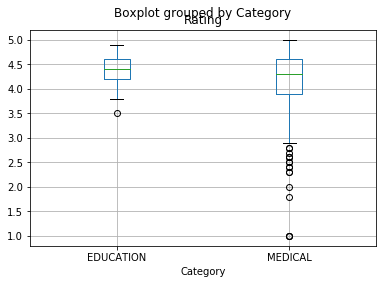

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


%matplotlib inline


data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"]==19].index

data=data.drop(i)
#data.query('Category == "EDUCATION"', inplace = False) 

check_apps = data[(data.Category == "EDUCATION") | (data.Category == "MEDICAL")]

educ_apps = data[data.Category == "EDUCATION"]

med_apps = data[data.Category == "MEDICAL"]


check_apps.boxplot(column="Rating",by="Category")


varianza_educ=educ_apps.loc[:,"Rating"].var()

varianza_med=med_apps.loc[:,"Rating"].var()


print("La varianza del rating de las aplicaciones de educacion es : " + str(varianza_educ))
print("La varianza del rating de las aplicacione de salud es : "+ str(varianza_med))


print("La desviación estandar del rating de las aplicaciones de educacion es : " + str(educ_apps["Rating"].std()))
print("La desviación estandar del rating de las aplicacione de salud es : "+ str(med_apps["Rating"].std()))



#print (data)

#data.query('Category == "MEDICAL"', inplace = False) 
#print(data)

plt.show()

>c) Construya un boxplot sobre la cantidad de instalaciones de las aplicaciones cuyo rating sea menor a 4 y otro para las aplicacions cuyo rating sea mayor o igual a 4, compare lo que observa. 

A partir de los boxplots se puede analizar:

- El 75% inferior de las aplicaciones con rating menor a 4 son descargadas menos que el 25% superior de las con Rating mayor o igual a 4.

- El 50% de las aplicaciones con rating mayor o igual a 4 tienen una dispersión mayor en torno a la mediana que las que tienen un rating menor a 4, es decir, las aplicaciones con rating mayor o igual a 4 no se concentran en torno a un cierto valor de descarga, mientras que las con menor a 4 tienden a descargarse en torno a un valor conocido (la mediana de los datos).

-




**Hint:** Podría aplicar algún cambio de escala a los valores. ¿Cuál? No log sé. 

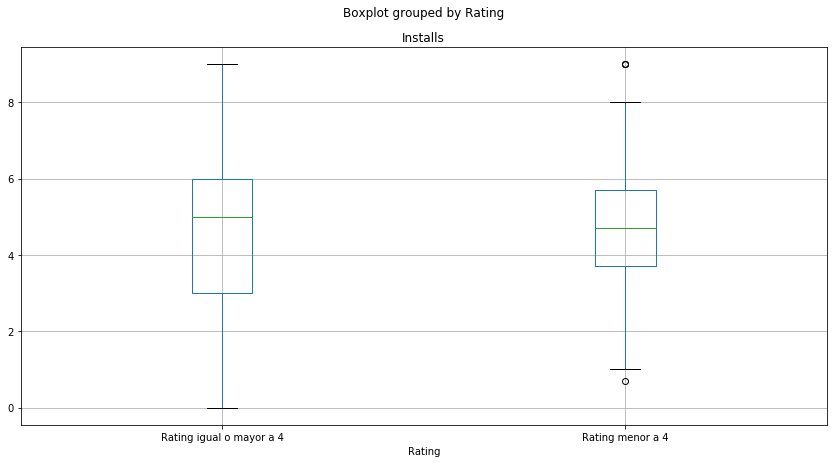

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

def change_log(x):
    if x > 0:
        return math.log(x,10)
    else:
        return 0

def mayore(x):
    if x<4:
        return "Rating menor a 4"
    
    else:
        return "Rating igual o mayor a 4"
    
%matplotlib inline


data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"] == 19].index

data=data.drop(i)



data["Installs"] = data["Installs"].apply(lambda x : int(x.replace("+","").replace(",","")))


data["Installs"] = data["Installs"].apply(change_log)

data["Rating"] = data["Rating"].apply(mayore)


data.boxplot(column="Installs",by="Rating", figsize=(14,7))

plt.show()






>d) Para cada categoría obtenga el rango, la deviación estándar, varianza del rating y la cantidad de aplicaciones pertenecientes a dicha categoría y responda:

* De las aplicaciones de mayor rango (fíjelo usted) ¿Cuáles presentan mayor y menor variabilidad?
* ¿Cuál es la principal diferencia entre las aplicaciones cuyo rango es inferior a 2.5 y las cuyo rango es mayor a dicho valor? (Si usted no nota una diferencia significativa es una respuesta válida, siempre y cuando esté fundamentada)
* ¿Es posible concluir que las categorías con una mayor cantidad de aplicaciones presentan una mayor variabilidad de rating que aquellas con menos aplicaciones? 

a) Se estudiaran las con rango mayor a 3.5:

-Las con mayor variabilidad son MEDICAL , LIFESTYLE, HEALTH_AND_FITNES,COMMUNICATION,BUSINESS y FINANCE (en orden decreciente de varibilidad) , mientras que las que presentan menor variabialidad son DATING,TOOLS,PRODUCTIVITY,FAMILY,SPORTS y GAME (en orden decreciente).

b) No se encontro una diferencia destacable entre estos valores de rango, ya que el rango es una medida estadistica muy cruda y nada robusta, por lo tanto es sensible a outliers. Una forma de apreciar esto seria que en un conjunto de datos de 100 valores, 98 valores pueden encontrarse en un intervalo entre [50,55] pero los otros dos que quedan son 0 y 100, dando un rango de 100. Es por esto que para denotar alguna diferencia en los datasets es mas optimo comparar varizanzas, quartiles o desviaciones estandar. Si el rango sirve para identificar entre que valores se mueve el dataset.

c)No es posible concluir que una mayor cantidad de aplicaciones implique una mayor variabilidad de rating ya que podemos observar que hay aplicaciones con menor cantidad (menor a 100 apps) con una varianza muy mayor a tipos de aplicaciones con mayor cantidad (mayor a 300). Para demostrar lo anterior se realizaron dos graficos de dispersión junto con determinar si existia una linea de tendencia creciente entre la cantidad de aplicación y su variabilidad.



Para la categoria : ART_AND_DESIGN


La varianza es : 0.13048633879781424
La desviación estandar es : 0.36122892851737975
El rango es : 1.7999999999999998
La cantidad de aplicaciones de la categoria ART_AND_DESIGN es : 64


Para la categoria : AUTO_AND_VEHICLES


La varianza es : 0.2956012176560121
La desviación estandar es : 0.5436922085665861
El rango es : 2.8000000000000003
La cantidad de aplicaciones de la categoria AUTO_AND_VEHICLES es : 85


Para la categoria : BEAUTY


La varianza es : 0.1314808362369338
La desviación estandar es : 0.36260286297398947
El rango es : 1.8000000000000003
La cantidad de aplicaciones de la categoria BEAUTY es : 53


Para la categoria : BOOKS_AND_REFERENCE


La varianza es : 0.19153705269089888
La desviación estandar es : 0.4376494632590092
El rango es : 2.3
La cantidad de aplicaciones de la categoria BOOKS_AND_REFERENCE es : 222


Para la categoria : BUSINESS


La varianza es : 0.4354175253243549
La desviación estandar es : 0.6598617471291656
El ran

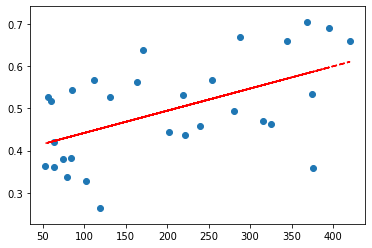

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

    
%matplotlib inline

def rango_stat(x):
    return x["Rating"].max()-x["Rating"].min()



data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 


i = data[data["Rating"] == 19].index

data=data.drop(i)

for categoria in data["Category"].unique():
    print("\n")
    print("Para la categoria : " + categoria)
    print("\n")
    print("La varianza es : " + str(data[data["Category"] == categoria ]["Rating"].var()))
    print("La desviación estandar es : " + str(data[data["Category"] == categoria ]["Rating"].std()))
    print("El rango es : " + str(rango_stat(data[data["Category"] == categoria ])))
    print("La cantidad de aplicaciones de la categoria " + categoria + " es : " + str(data[data["Category"] == categoria ]["App"].count()) )

    
    

xx=[]
xy=[]
xyy= []
for categoria in data["Category"].unique():
    if data[data["Category"] == categoria ]["App"].count()<700:
        xx.append(data[data["Category"] == categoria ]["App"].count())
        xy.append(data[data["Category"] == categoria ]["Rating"].std())
        xyy.append(data[data["Category"] == categoria ]["Rating"].var())

        
plt.scatter(xx,xy)

#plt.scatter(xx,xyy)

z = np.polyfit(xx, xy, 1)
p = np.poly1d(z)
plt.plot(xx,p(xx),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))


"""
d= {"Cantidad" : xx , "standar" : xy}
df = pd.DataFrame(d)

print(df)
df.plot()
"""
plt.show()



>e) Responda las siguientes preguntas: 

* Si mi aplicación pesa mucho ¿es probable que sea mal calificada?
* Si mi aplicación tiene una mayor cantidad de instalaciones ¿su rating será más alto?
* Si mi app está enfocada en alguna categoría en especial ¿tendrá una mayor cantidad de instalaciones?
* ¿Existe alguna categoría donde se aprecien más aplicaciones pagas que gratuitas?

a) no se aprecia una relación directa entre que una aplicación pese mucho y que esta sea mal calificada (explayarse mas de esto a futuro)

b) si se parecia que una app con rating mas alto tendera a tener mas instalaciones o la menos variara menos su rating y generalmente sera mas alto que x valor (explayarse mas y mas preciso)

c) si se ve una relación (explayarse blahlaasjkljd)

d) no en ninguna se aprecia (explayarse en esta wea tmbn)

Fundamente su respuesta utilizando herramientas visuales o estadísticas. 

              Categoria  Gratis  Pago
0        ART_AND_DESIGN      61     3
1     AUTO_AND_VEHICLES      82     3
2                BEAUTY      53     0
3   BOOKS_AND_REFERENCE     194    28
4              BUSINESS     408    12
5                COMICS      56     0
6         COMMUNICATION     288    27
7                DATING     165     6
8             EDUCATION     115     4
9         ENTERTAINMENT     100     2
10               EVENTS      63     1
11              FINANCE     328    17
12       FOOD_AND_DRINK     110     2
13   HEALTH_AND_FITNESS     273    15
14       HOUSE_AND_HOME      74     0
15   LIBRARIES_AND_DEMO      83     1
16            LIFESTYLE     350    19
17                 GAME     877    82
18               FAMILY    1648   183
19              MEDICAL     312    83
20               SOCIAL     236     3
21             SHOPPING     200     2
22          PHOTOGRAPHY     262    19
23               SPORTS     301    24
24     TRAVEL_AND_LOCAL     207    12
25          

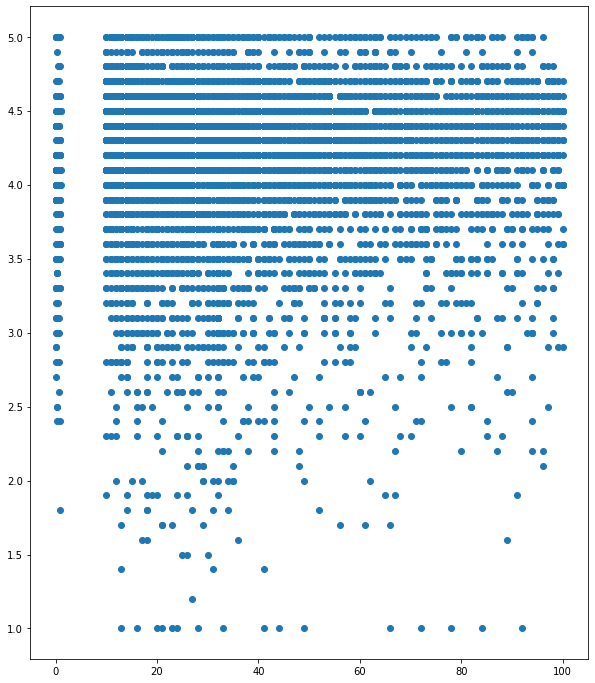

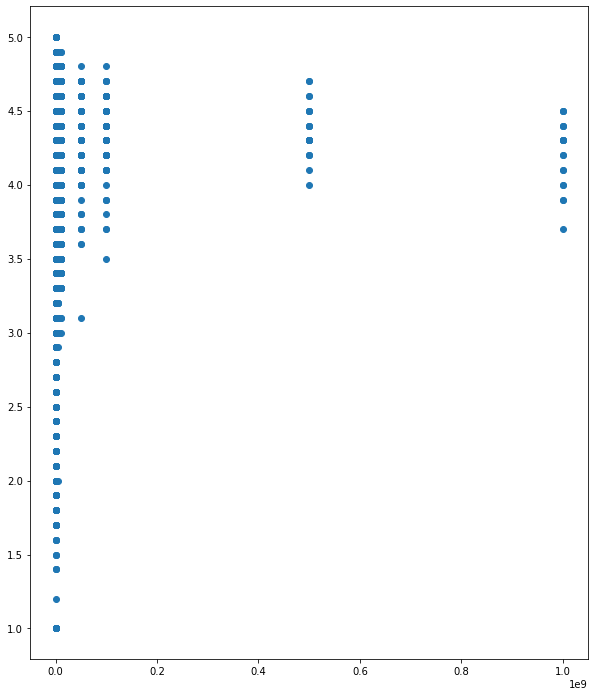

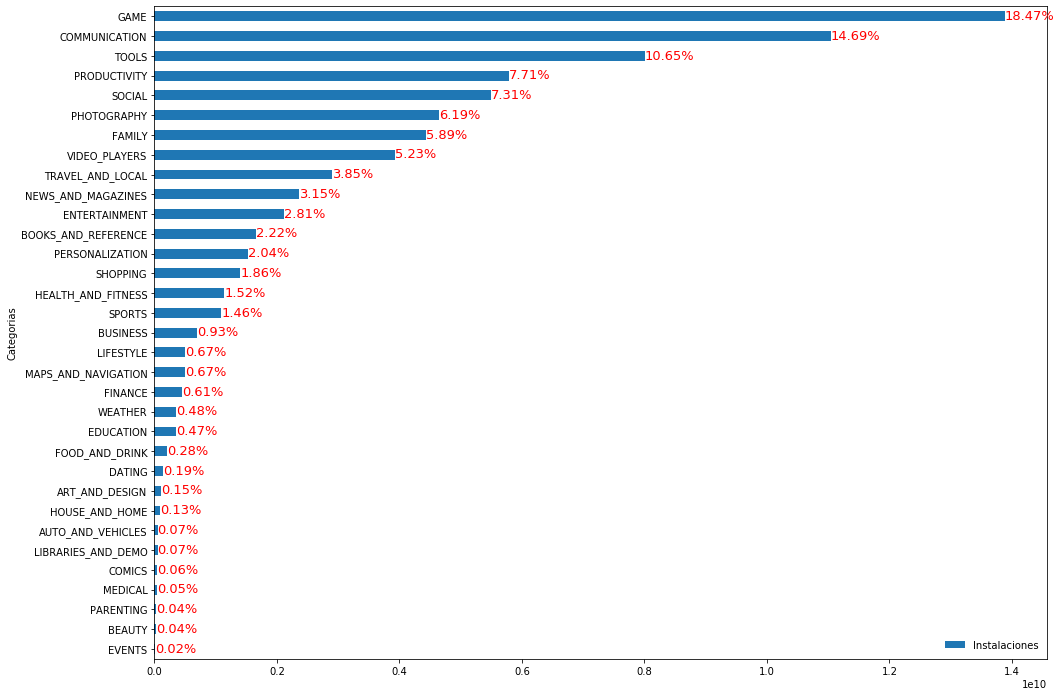

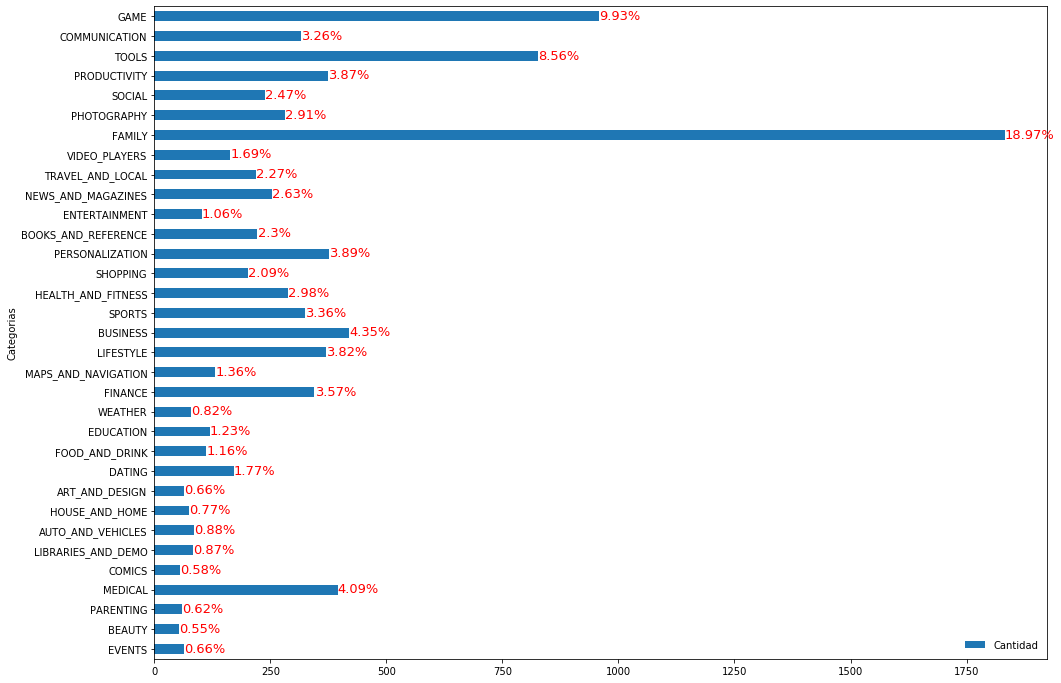

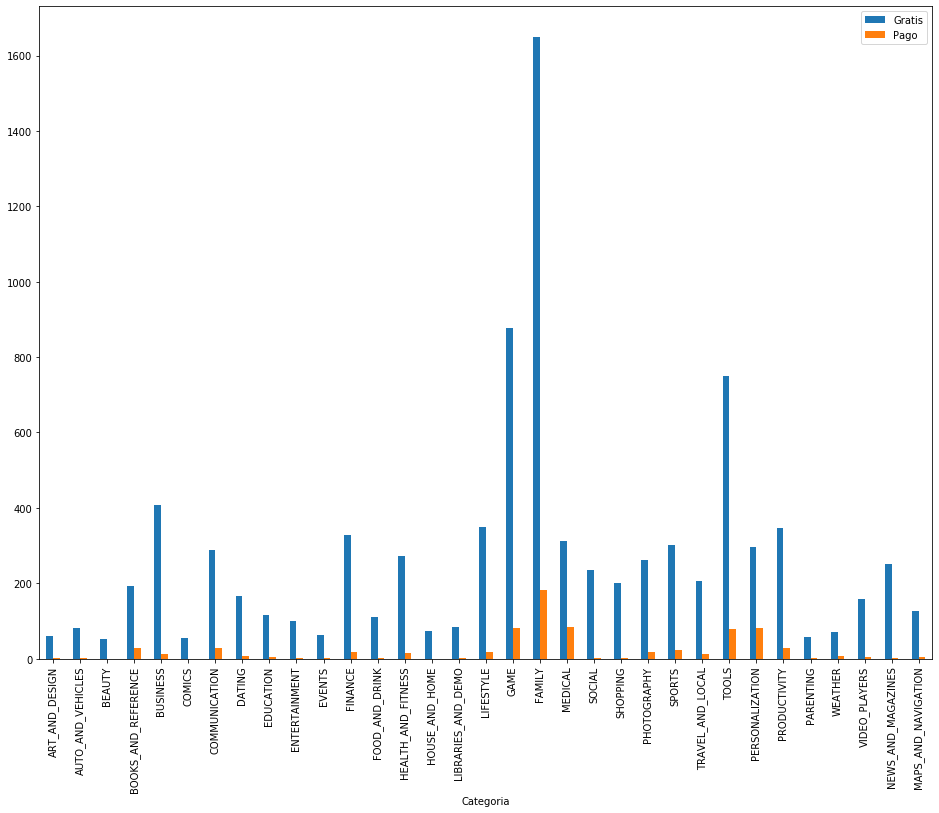

In [2]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math



def tamanno_M(x):
    if "Varies with device" == x :
        return x
    if "M" in x :
        x = x.replace(".","").replace("M","")
        return float(x)
    elif "k" in x:
        x = x.replace(".","").replace("k","")
        x = float(x)/float(10**3)
        return x

def cleaning(x,prom):
    if x == "Varies with device" :
        return prom
    else:
        return x

data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"] == 19].index


data=data.drop(i)
promedios={}


data["Size"] = data["Size"].apply(tamanno_M)

data["Size"] = data["Size"].apply(cleaning,prom = data[data["Size"] != "Varies with device"]["Size"].median())


data["Installs"] = data["Installs"].apply(lambda x : int(x.replace("+","").replace(",","")))

inst_cat = []
totales_cat = []
cuantas_son = []

for categoria in data["Category"].unique():
    totales_cat.append(data[data["Category"] == categoria]["Installs"].sum())
    cuantas_son.append(data[data["Category"] == categoria]["App"].size)
    inst_cat.append(categoria)



install_creator = { "Categorias" : inst_cat, "Instalaciones" : totales_cat, "Cantidad" : cuantas_son}

data_from_instal = pd.DataFrame(install_creator)
data_from_instal = data_from_instal.sort_values(by=['Instalaciones'])



#Recuerda que hay una linea que no es ni paid ni free
categorias = []
free_apps = []
paid_apps = []
for categoria in data["Category"].unique():
    total_free = data[(data["Category"] == categoria) & (data["Type"] == "Free")]["App"].size
    total_pay  = data[(data["Category"] == categoria) & (data["Type"] == "Paid")]["App"].size
    categorias.append(categoria)
    free_apps.append(total_free)
    paid_apps.append(total_pay)

costo_creator = {"Categoria" : categorias, "Gratis" : free_apps, "Pago" : paid_apps }
data_from_costo = pd.DataFrame(costo_creator)

plt.show()


plt.figure(figsize=(10,12))
    
plt.scatter(data["Size"],data["Rating"])

#plt.scatter(xx,xyy)

plt.show()

plt.figure(figsize=(10,12))
   
plt.scatter(data["Installs"],data["Rating"])

plt.show()


ax = data_from_instal.plot(x="Categorias", y="Instalaciones", kind = "barh",figsize=(16,12))

alturas = []

for a in ax.patches:
    alturas.append(a.get_width())

total = sum(alturas)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((i.get_width()/total)*100,2))+"%",fontsize=13, color = "red")
ax. legend(loc='lower right', frameon=False)
    
plt.show()

ax = data_from_instal.plot(x="Categorias", y="Cantidad", kind = "barh",figsize=(16,12))

alturas = []

for a in ax.patches:
    alturas.append(a.get_width())

total = sum(alturas)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.1, str(round((i.get_width()/total)*100,2))+"%",fontsize=13, color = "red")
ax. legend(loc='lower right', frameon=False)

plt.show

data_from_costo.plot(x="Categoria", y=["Gratis","Pago"], kind = "bar",figsize=(16,12))

plt.show()

#data["Size"] = data["Size"].apply(tamanno_M)

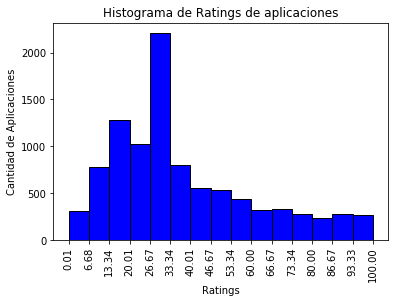

In [6]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math



def tamanno_M(x):
    if "Varies with device" == x :
        return x
    if "M" in x :
        x = x.replace(".","").replace("M","")
        return float(x)
    elif "k" in x:
        x = x.replace(".","").replace("k","")
        x = float(x)/float(10**3)
        return x

def cleaning(x,prom):
    if x == "Varies with device" :
        return prom
    else:
        return x

data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"] == 19].index


data=data.drop(i)
promedios={}


data["Size"] = data["Size"].apply(tamanno_M)

data["Size"] = data["Size"].apply(cleaning,prom = data[data["Size"] != "Varies with device"]["Size"].median())










counts, bins , patches = plt.hist(data["Size"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones')
plt.title('Histograma de Ratings de aplicaciones')

plt.xticks(bins,rotation="vertical")

plt.show()

>g) Haga un histograma para los ratings de cada categoría. ¿Observa algún patrón respecto al sesgo de los histogramas obtenidos?

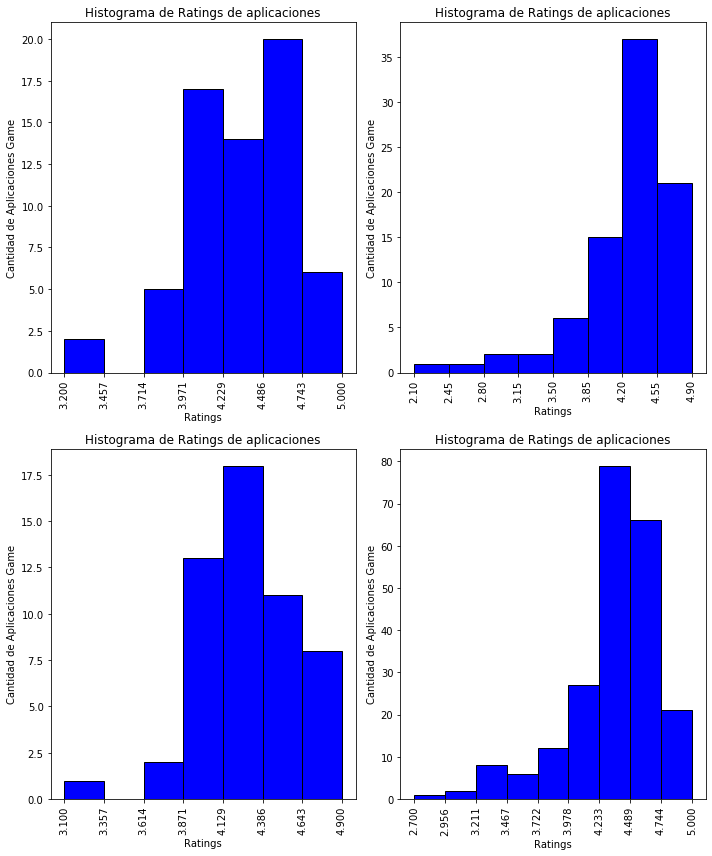

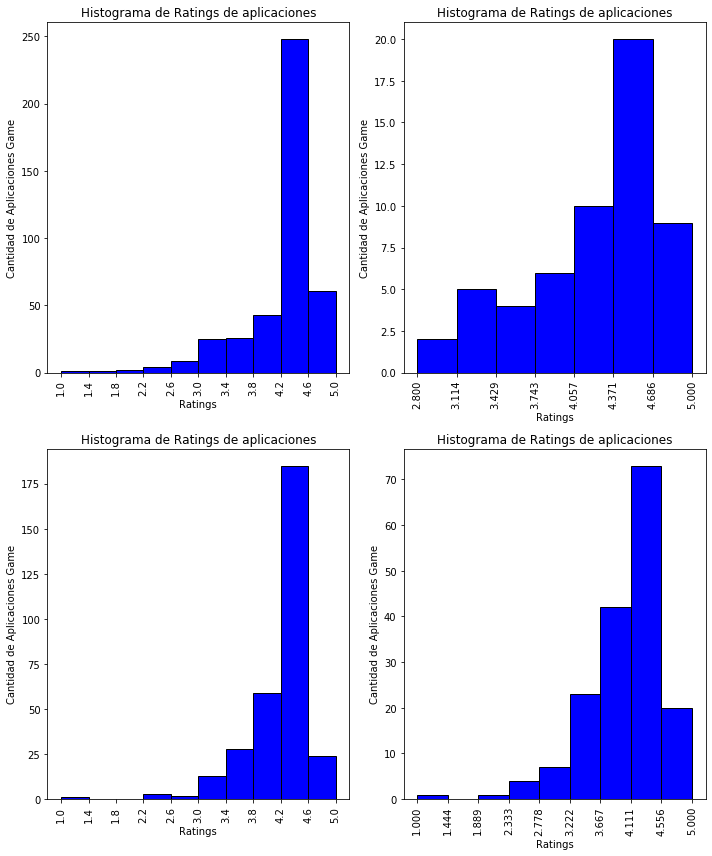

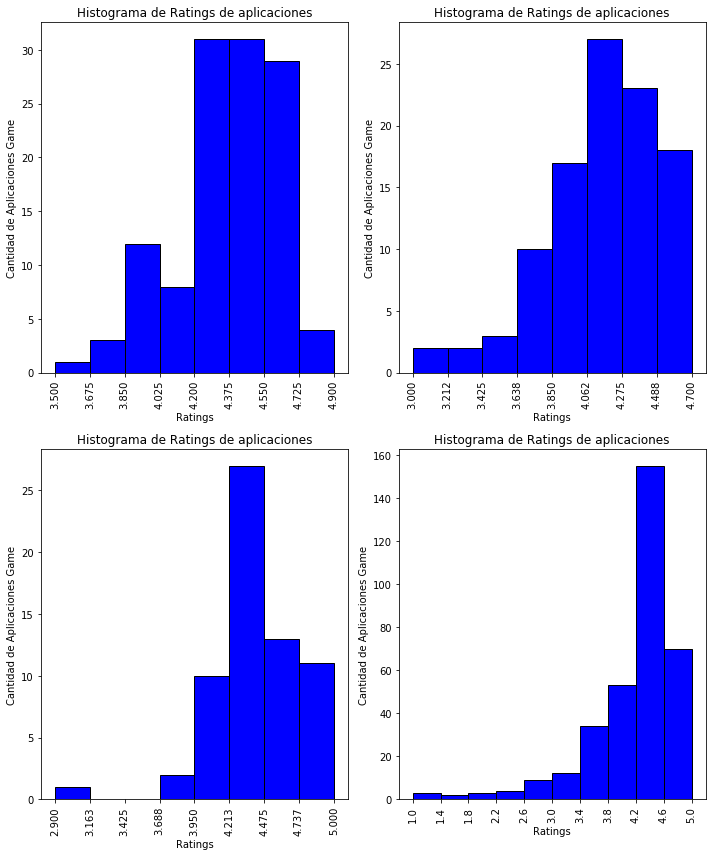

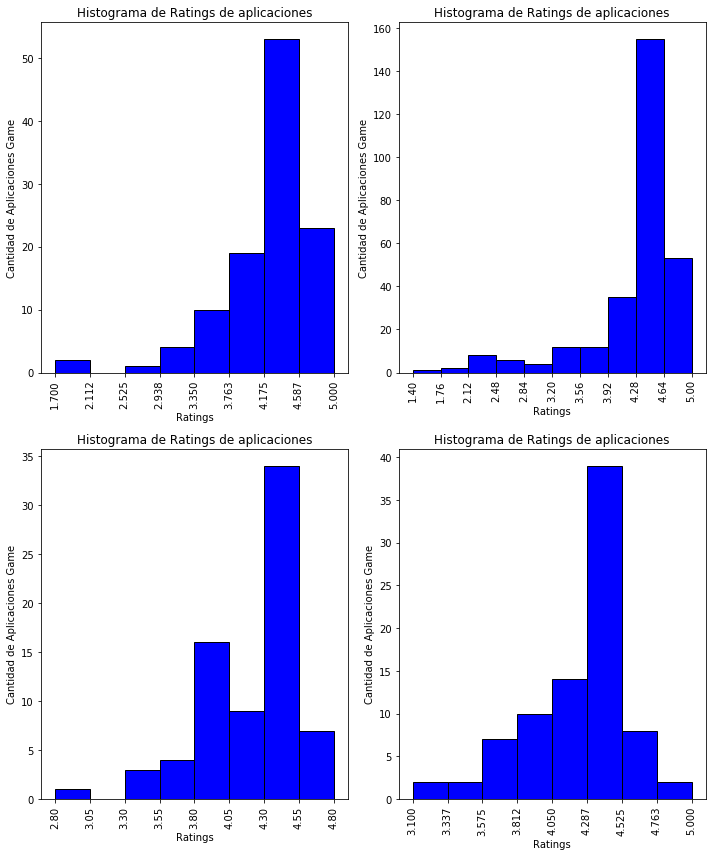

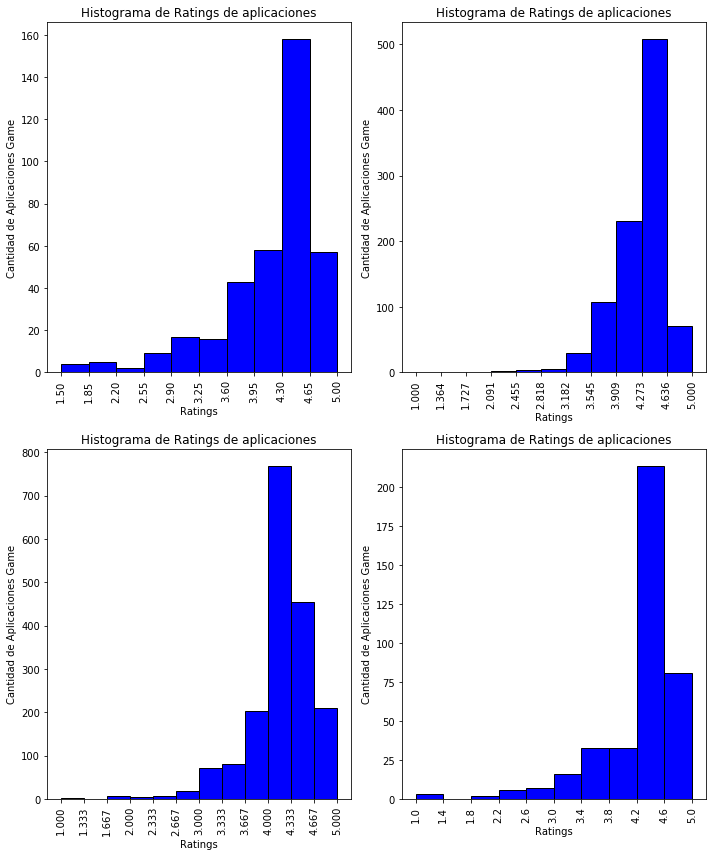

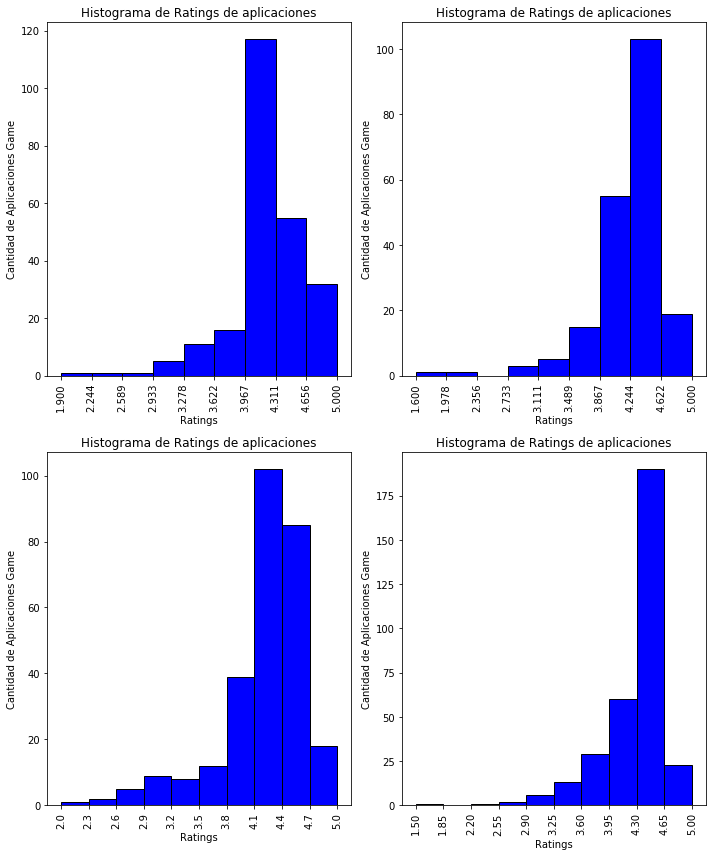

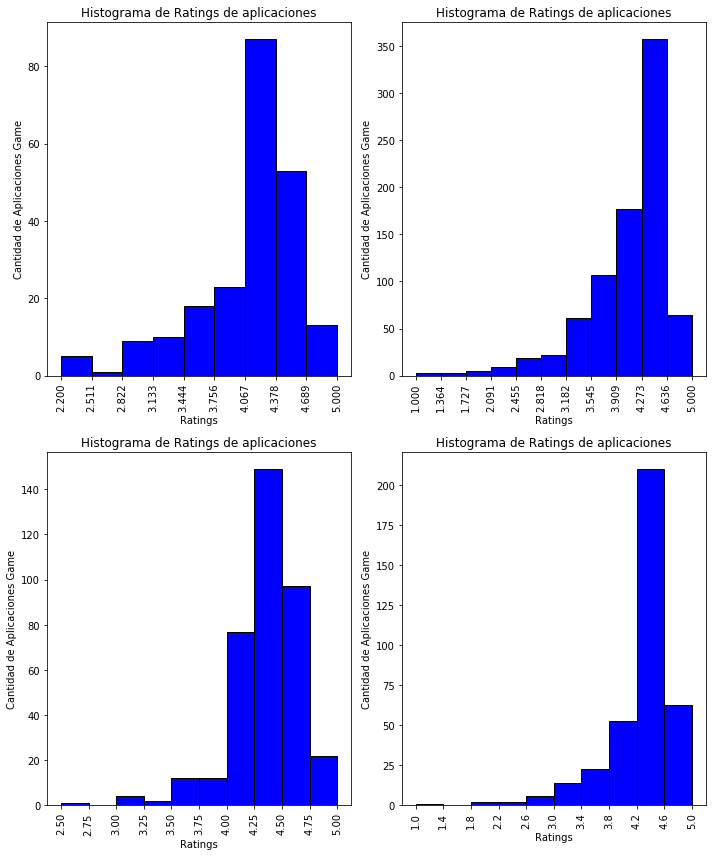

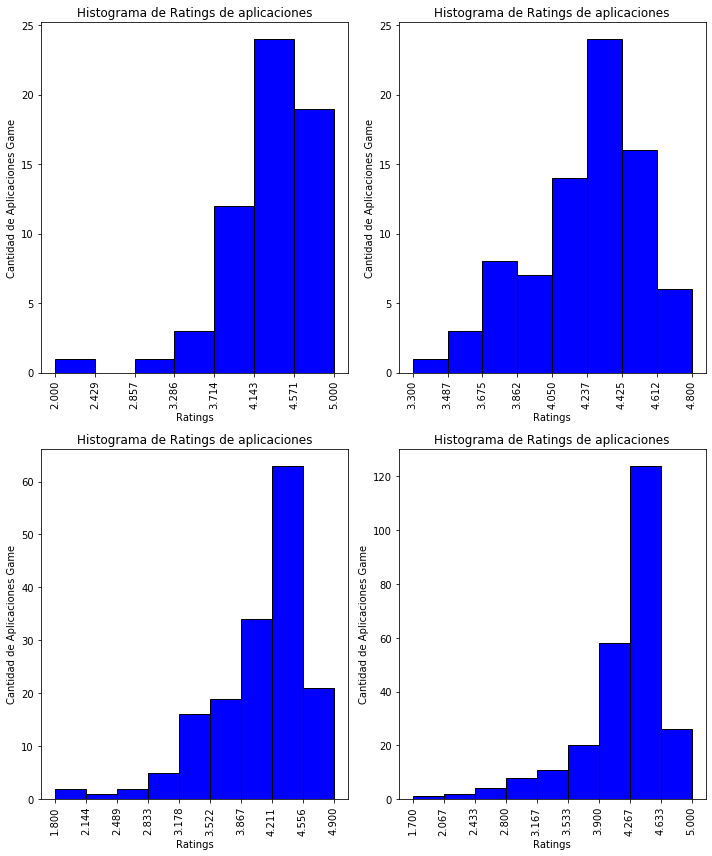

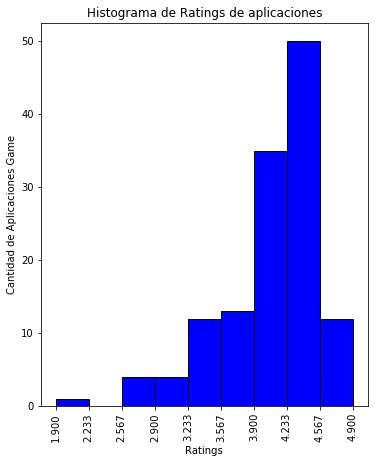

In [7]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"] == 19].index


data=data.drop(i)

cont=0



data["Rating"] = data["Rating"].fillna(data["Rating"].median())    

    
fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "ART_AND_DESIGN"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "AUTO_AND_VEHICLES"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "BEAUTY"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "BOOKS_AND_REFERENCE"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()

plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "BUSINESS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "COMICS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "COMMUNICATION"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "DATING"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "EDUCATION"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "ENTERTAINMENT"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "EVENTS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "FINANCE"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "FOOD_AND_DRINK"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "HEALTH_AND_FITNESS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "HOUSE_AND_HOME"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "LIBRARIES_AND_DEMO"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "LIFESTYLE"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "GAME"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "FAMILY"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "MEDICAL"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "SOCIAL"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "SHOPPING"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "PHOTOGRAPHY"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "SPORTS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "TRAVEL_AND_LOCAL"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "TOOLS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "PERSONALIZATION"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "PRODUCTIVITY"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))
fig.add_subplot(221)
counts, bins , patches = plt.hist(data[data["Category"] == "PARENTING"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(222)
counts, bins , patches = plt.hist(data[data["Category"] == "WEATHER"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

fig.add_subplot(223)
counts, bins , patches = plt.hist(data[data["Category"] == "VIDEO_PLAYERS"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")


fig.add_subplot(224)

counts, bins , patches = plt.hist(data[data["Category"] == "NEWS_AND_MAGAZINES"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,12))

fig.add_subplot(221)

counts, bins , patches = plt.hist(data[data["Category"] == "MAPS_AND_NAVIGATION"]["Rating"],bins="sturges",facecolor='blue',histtype='bar',edgecolor='k')

plt.xlabel('Ratings')
plt.ylabel('Cantidad de Aplicaciones Game')
plt.title('Histograma de Ratings de aplicaciones')
plt.xticks(bins,rotation="vertical")

plt.tight_layout()
plt.show()





>h) Construya un heatmap (debe investigarlo por su cuenta) de las aplicaciones pagas donde la dimensión de color sea el rating y los ejes sean el precio y el tamaño de la aplicación. Concluya respecto a lo observado.

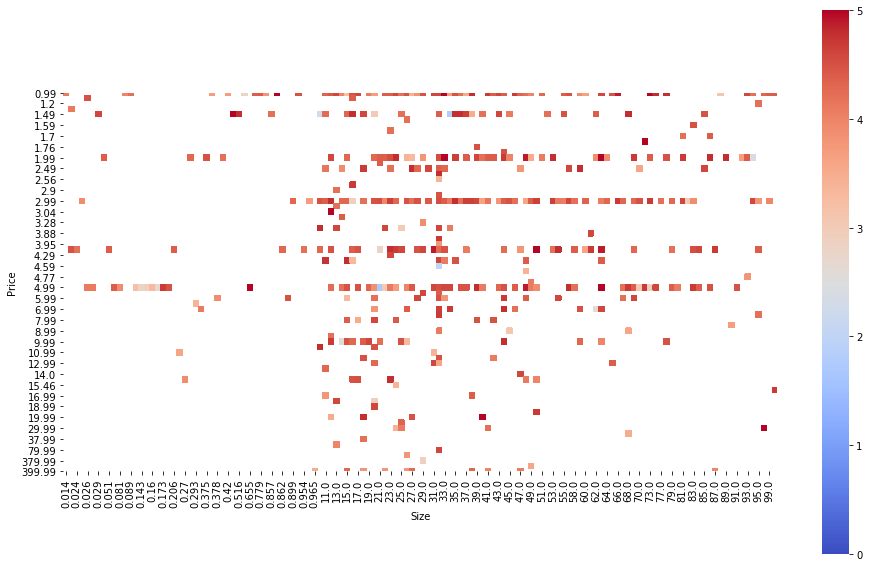

In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

def tamanno_M(x):
    if "Varies with device" == x :
        return x
    if "M" in x :
        x = x.replace(".","").replace("M","")
        return float(x)
    elif "k" in x:
        x = x.replace(".","").replace("k","")
        x = float(x)/float(10**3)
        return x

def cleaning(x,prom):
    if x == "Varies with device" :
        return prom
    else:
        return x    
def precios(x):
    return float(x.replace("$",""))
data = pd.read_csv("googleplaystore.csv")

data.drop_duplicates("App",keep = "first", inplace = True) 

i = data[data["Rating"] == 19].index


data=data.drop(i)


data["Size"] = data["Size"].apply(tamanno_M)

data["Size"] = data["Size"].apply(cleaning,prom = data[data["Size"] != "Varies with device"]["Size"].median())

data["Price"] = data["Price"].apply(precios)



data= data[data["Type"] == "Paid"]

plt.figure(figsize=(16,10))

a = data.pivot_table(index='Price', 
                   columns='Size', 
                   values='Rating', 
                   aggfunc='median')


ax = sns.heatmap(a, cmap="coolwarm", square = True, vmin=0, vmax=5)
plt.show()


## 3. Aproximando el perímetro de una circunferencia (20p)

De sus cursos de matemática seguro habrá escuchado acerca de las coordenas polares, un cambio de coordenadas donde representamos los puntos en función de un radio y un ángulo. 

$$
x = r\cdot cos(\theta)
$$

$$
y = r\cdot sin(\theta)
$$

Utilizando estas coordenadas, usted posicionará $n$ puntos aleatorios dentro de la circunferencia lo que generará un polígono irregular, para cada $n \in [4,\infty]$ elegido debe simular una cantidad suficiente de polígonos (800-1000) que utilizará para aproximar el perímetro de la circunferencia, luego calculará el perímetro promedio y la desviación estándar para cada $n$ utilizado.


Una vez haya simulado con varios $n$ distintos grafique el perímetro promedio junto a su margen de error $\bar{x} \pm \sigma$ y el perímetro real de la circunferencia. Utilice la cantidad de lados del polígono como el eje X de su gráfico.

> El gráfico involucra 4 lineas: promedio del perímetro, perímetro real, límite superior del error y límite inferior del error.

Recuerde explicar cómo utilizará el método de los polígonos para aproximar el perímetro de la circunferencia y concluya a partir de lo que observa en el gráfico.

Algunos ejemplos de $n = 5$

<table style="width:100%">
  <tr>
    <th align="right"><img src="img/ej1.png" style="float:left;height:120px"></th>
    <th align="center"><img src="img/ej2.png" style="float:left;height:120px"></th> 
    <th align="left"><img src="img/ej3.png" style="float:right;height:120px"></th>
  </tr>
    
Para facilitar la construcción del polígono se sugiere generar los $n$ puntos y luego conectarlos en sentido antihorario/horario.

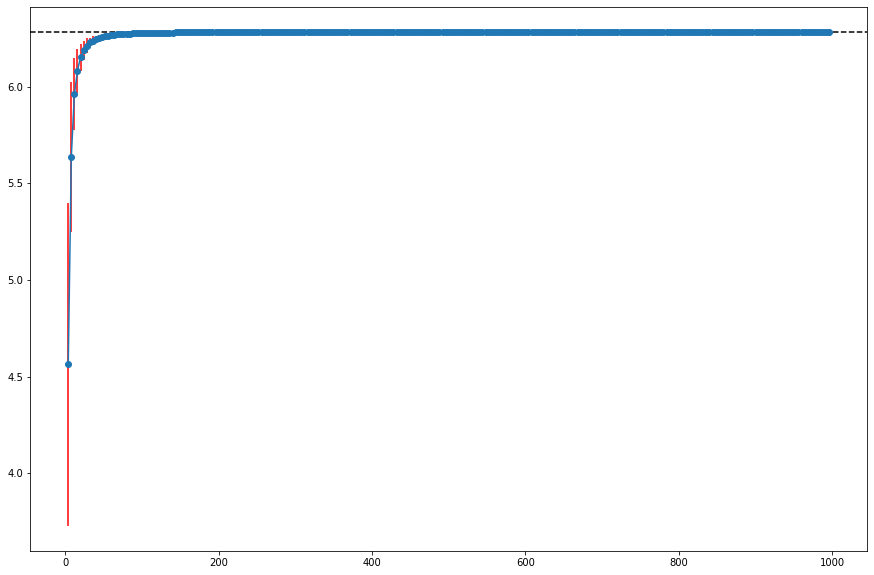

Wall time: 7min 16s


In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline


def distancias(puntos):
    #Esta es la función para calcular las distancias entre los puntos que se usaran para
    #aproximar el perímetro, la distancia está en funcion del ángulo.
    puntos.sort()
    suma = 0
    for indice in range(len(puntos)):
        if indice == len(puntos)-1:
            delta_x = math.cos(puntos[indice])-math.cos(puntos[0])
            delta_y = math.sin(puntos[indice])-math.sin(puntos[0])
            suma += math.sqrt(delta_x**2 + delta_y**2)
            ###
        else:
            delta_x = math.cos(puntos[indice])-math.cos(puntos[indice +1])
            delta_y = math.sin(puntos[indice])-math.sin(puntos[indice+1])
            suma += math.sqrt(delta_x**2 + delta_y**2)
    return suma
            
    

random.seed(1)
#random.uniform(0,2*math.pi)

#Estructuras para guardar los datos
per_prom = [] #perimetros promedios de poligonos de n lados
desv_est = [] #desviacion estandar de poligonos de n lados
eje_x = [] #eje x para el grafico donde almacenamos n

#¿Dónde debe ir la semilla para replicar el procedimiento? Cuidado de no generar siempre el mismo polígono
#usando mal la semilla
for n in range(4,1000,4): #vamos agregando 4 puntos cada vez, esto pueden variarlo a lo que quieran
    #Resetear el arreglo de las aproximaciones de perimetro para cada N
    perimetros_aproximados = []
    for c in range(1000):
        puntos = np.random.uniform(0,2*math.pi,n) #generamos los angulos altiro
        while len(set(puntos))!=n:
            puntos = np.random.uniform(0,2*math.pi,n)
        perimetro = distancias(puntos)
        perimetros_aproximados.append(perimetro)
        #pendiente: hacer funcion que checkee repetidos -> importante para asegurar poligono de n lados
        #calcular el perimetro aproximado
        #almacenarlo
    per_prom.append(float(sum(perimetros_aproximados))/float(len(perimetros_aproximados)))
    desv_est.append(np.std(perimetros_aproximados))
    eje_x.append(n)
    #algo hay que hacer aqui una vez tenemos los 10000 perimetros_aproximados

zippedList =  list(zip(eje_x, per_prom, desv_est))
multi_info = pd.DataFrame(zippedList, columns = ['N lados' , 'Promedio Perimetro', 'Desviación Estandar'])

fig, ax = plt.subplots(figsize=(15,10))

plt.axhline(y=2*math.pi, color='black', linestyle='--')

ax.errorbar(multi_info["N lados"],multi_info["Promedio Perimetro"],
            yerr=multi_info["Desviación Estandar"],
            fmt='-o',ecolor='red')

plt.show()
#salir del doble for hacer grafico

## 4. Bingo Ball (30p)

A usted se le ha presentado la oportunidad de ganar un increíble premio que cuesta 10 veces el valor de 1 intento en el juego de de "Bingo Ball", el juego consiste en lo siguiente (instrucciones abajo del diagrama)

<img src="img/game.png">

En el diagrama, los círculos representan "etapas" por las que la bolita puede pasar. El funcionamiento del juego es el siguiente:

* Usted lanzará 7 bolitas secuencialmente.
* Cada bolita llega inicialmente a A, B, C o D (no entre medio o a algún otro lugar). Esto se asume equiprobable a menos que se diga lo contrario.
* En cada etapa la bolita tiene la posibilidad de caer hacia la izquierda o a la derecha. Ciertas etapas (relleno amarillo) hacen que la bolita caiga en una única dirección ya que la bolita caería del tablero si no fuera así.
* La bolita si o sí pasará por una y solo una etapa de cada fila $F_{i}\;\; i \in [1,4]$ (linea punteada en el diagrama)
* Usted ganará el juego si cada zona final (1,2,3,4) es alcanzada al menos 1 vez por cada bolita.

>En palabras simples, la bolita va bajando mientras cambia (o no) de dirección al chocar con los puntos negros.


A continuación, se presenta un ejemplo del recorrido de una bola:

<img src="img/game2.png">

Como puede ver, la bola inicialmente llegó a "A", luego su recorrido fue: izquierda, derecha (no hay otra opción), derecha, derecha y finalmente llegó a la zona 2.

El tablero que se presenta en ambos diagramas es el mismo tablero que deberá simular (es fijo). 
Considere que $P(irse\;a\;la\;izquierda) = 0.5$ a menos que se indique lo contrario.

En base a esto responda:

>a) ¿La cantidad de bolitas suministradas es suficiente para poder obtener el premio a un precio menor que el original?


> b) Para $4 \leq n \leq 100$ calcule la probabilidad de ganar el juego al menos 1 vez en función de $n$ bolas. Presente el resultado en un gráfico de Probabilidad v/s $n$.

No basta 1 simulación para cada $n$

>c) Si a usted le queda 1 bola restante y solamente le falta cubrir la zona 3 determine la zona inicial a la que deberá apuntar el tiro para maximizar la probabilidad de ganar. 

>d) Determine la probabilidad de alcanzar cada zona final si la bola llega inicialmente a "A". Repita el procedimiento pero esta vez utilizando "C" como punto de partida.

>e) Si ahora la bola tiene un 70% de probabilidad de mantener la dirección actual y un 30% de cambiar de dirección ¿Mantiene la respuesta dada en a)?

En la zona inicial (A,B,C,D) tiene la misma probabilidad de irse tanto a la izquierda como a la derecha, pero en las siguientes zonas si la bolita fue a la izquierda tiene un 70% de irse a la izquierda y un 30% de irse a la derecha, si después se va a la derecha tiene un 70% de probabilidad de irse a la derecha y así sucesivamente.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)